In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

In [32]:
energy_consumption = pd.read_table("energy_log.txt", delim_whitespace=True, header=0, na_values=-1)
energy_consumption.head()

,Tasks,Stock,Meltdown,Spectre,MDS
0,aio-stress,16.42,16.25,16.25,16.25
1,aircrack-ng,17.50,17.50,17.50,17.50
2,aobench,16.90,16.90,16.87,16.90
3,apache,18.27,18.12,18.05,18.07
4,nginx,18.30,18.15,18.07,18.10


In [38]:
idx=["aio-stress", "aircrack-ng", "aobench", "apache", "nginx", "crafty", "tscp", "stockfish", "p7zip", "bzip2", "zstd", "xz", "byte_register", "byte_dhry2", "byte_int", "byte_float", "scimark2", "fhourstones", "gmpbench", "dcraw", "sudokut", "nero2d", "minion", "hmmer", "rodinia_euler3d_cpu_double", "rodinia_lavaMD", "rodinia_sc_omp", "openssl", "sysbench_cpu", "sysbench_memory", "blake2s", "blogbench_read", "blogbench_write", "x264", "x265", "ctx_clock", "c-ray", "povray", "cachebench_read", "cachebench_write", "cachebench_mixed", "cachebench_memset", "cachebench_memcpy", "cloverleaf", "brlcad", "cpp-perf-bench_stepanov_abstraction", "cpp-perf-bench_stepanov_vector", "cpp-perf-bench_functionobjects", "cpp-perf-bench_atol", "cpp-perf-bench_ctype", "cpp-perf-bench_mathlib", "cpp-perf-bench_random_numbers", "dacapo_eclipse", "dacapo_h2", "dacapo_jython", "dacapo_tradebeans", "dacapo_tradesoap", "ebizzy", "glibc-bench_bench-ffsll", "glibc-bench_bench-ffs", "glibc-bench_bench-pthread_once", "glibc-bench_bench-tanh", "glibc-bench_bench-sqrt", "glibc-bench_bench-sin", "glibc-bench_bench-cos", "glibc-bench_bench-asinh", "glibc-bench_bench-atanh", "glibc-bench_bench-sincos", "glibc-bench_bench-sinh", "glibc-bench_bench-modf", "glibc-bench_bench-exp", "glibc-bench_bench-log2", "himeno", "hint_float", "hint_double", "hpcg", "build-linux-kernel", "john-the-ripper_bcrypt", "john-the-ripper_md5crypt", "lzbench_-ezstd", "lzbench_-ebrotli", "lzbench_-elibdeflate", "lzbench_-exz", "m-queens", "mbw_512", "mbw_1024", "mbw_4096", "mcperf_get", "mcperf_set", "mcperf_delete", "mcperf_add", "mcperf_replace", "mcperf_append", "mcperf_prepend", "mkl-dnn_conv_all", "mkl-dnn_conv_googlenet_v3", "mkl-dnn_conv_alexnet", "mkl-dnn_ip_1d", "mkl-dnn_ip_all", "mkl-dnn_rnn_training", "node-express-loadtest", "numenta-nab", "phpbench", "primesieve", "pymongo", "rbenchmark", "redis_get", "redis_set", "redis_lpush", "redis_lpop", "redis_sadd", "rust-prime", "scikit", "stress-ng_vecmath", "stress-ng_matrix", "stress-ng_fork", "stress-ng_msg", "stress-ng_sem", "stress-ng_sock", "stress-ng_switch", "stream", "swet", "t-test1", "tensorflow", "tinymembench", "ttsiod-renderer", "xsbench", "ramspeed_copy_int", "ramspeed_scale_int", "ramspeed_add_int", "ramspeed_triad_int", "ramspeed_copy_float", "ramspeed_scale_float", "ramspeed_add_float", "ramspeed_traid_float", "botan_AES-256", "botan_Blowfish", "botan_CAST-256", "botan_KASUMI", "botan_Twofish", "build-gcc", "javascimark2", "sunflow", "sqlitebench", "iozone_-s2096000", "iozone_-s4096000", "iozone_-s8126000", "dbench_1", "dbench_6", "dbench_12", "dbench_48", "dbench_128", "dbench_256", "postmark", "fs-mark_1000_Files_1MB_Size", "fs-mark_5000_Files_1MB_Size_4_Threads", "fs-mark_4000_Files_32_Sub_Dirs_1MB_Size", "bork", "ffmpeg", "encode-mp3", "graphics-magick_minify", "graphics-magick_gaussian", "graphics-magick_sharpen", "graphics-magick_rotate", "graphics-magick_resize", "rocksdb_fillseq", "rocksdb_fillrandom", "rocksdb_readrandom", "cassandra_write", "cassandra_read", "cassandra_mixed_1_1", "cassandra_mixed_1_3", "compilebench_initial_create", "compilebench_compile", "compilebench_read_compile_tree", "smallpt", "build-php", "inkscape", "rawtherapee", "tjbench", "darktable_masskrugNEF", "darktable_benchSRW", "darktable_server_roomNEF", "rsvg", "gegl_rotate-on-center", "gegl_scale-size", "gegl_antialias", "gegl_cartoon", "gegl_color-enhance", "gegl_crop", "gegl_wavelet-blur", "gegl_reflect", "gegl_tile-glass", "renaissance_akka-uct", "renaissance_reactors", "renaissance_als", "renaissance_naive-bayes", "renaissance_page-rank", "renaissance_db-shootout", "renaissance_dotty", "renaissance_finagle-chirper", "java-jmh", "schbench_2", "schbench_4", "schbench_8", "osbench_create_files", "osbench_create_processes", "osbench_create_threads", "osbench_launch_programs", "osbench_mem_alloc", "tiobench_write", "tiobench_read", "tiobench_random_write", "tiobench_random_read", "pybench", "network-loopback", "svt-vp9_tune_0", "svt-vp9_tune_1", "svt-vp9_tune_2", "svt-hevc", "tungsten_hair", "tungsten_water-caustic", "tungsten_non-exponential", "tungsten_volumetric-caustic", "ospray_san_miguel", "ospray_xfrog_forest", "ospray_magnetic_reconnection", "embree_crown", "embree_asian_dragon", "embree_asian_dragon_obj", "iperf_tcp", "iperf_udp", "oidn", "pyperformance-run_2to3", "pyperformance-run_chaos", "pyperformance-run_crypto_pyaes", "pyperformance-run_django_template", "pyperformance-run_float", "pyperformance-run_go", "pyperformance-run_json_loads", "pyperformance-run_nbody", "pyperformance-run_pathlib", "pyperformance-run_pickle_pure_python", "pyperformance-run_python_startup", "pyperformance-run_raytrace", "pyperformance-run_regex_compile", "rays1bench", "cp2k", "svt-av1", "dav1d_summer_nature_1080pivf", "dav1d_summer_nature_4kivf", "dav1d_chimera_8b_1080pivf", "dav1d_chimera_10b_1080pivf", "cpuminer-opt_lbry", "cpuminer-opt_sha256t", "cpuminer-opt_skein", "cpuminer-opt_myr-gr", "cpuminer-opt_m7m", "cpuminer-opt_deep", "vpxenc", "mt-dgemm", "deepspeech", "octave-benchmark", "build-llvm", "build2", "build-gdb", "encode-flac", "openarenaG_800x600", "openarenaG_1024x768", "openarenaG_1920x1080", "openarenaG_2560x1440", "urbanterrorG_800x600", "urbanterrorG_1024x768", "urbanterrorG_1920x1080", "urbanterrorG_2560x1440", "unigine-valley_800x600", "unigine-valley_1024x768", "unigine-valley_1920x1080", "unigine-valley_2560x1440", "unigine-heaven_800x600", "unigine-heaven_1024x768", "unigine-heaven_1920x1080", "unigine-heaven_2560x1440", "glmark2_800x600", "glmark2_1024x768", "glmark2_1920x1080", "glmark2_2560x1440", "qgears_-image", "qgears_-render", "qgears_TEXT", "qgears_GEARSFANCY", "qgears_COMPO", "jxrend", "nexuiz_800x600", "nexuiz_1024x768", "nexuiz_1920x1080", "nexuiz_2560x1440", "xonotic_800x600", "xonotic_1024x768", "xonotic_1920x1080", "xonotic_2560x1440", "paraview_manyspheres", "paraview_waveletcontour", "paraview_waveletvolume", "indigobench_supercar", "indigobench_bedroom", "j2dbench_all", "j2dbench_images", "j2dbench_graphics", "j2dbench_text"]
cols=['Stock', 'Meltdown', 'Spectre', 'MDS']
data = energy_consumption.pivot_table( index='Tasks')
data_order= data.reindex_axis(cols, axis=1)
data_order.head()


,Stock,Meltdown,Spectre,MDS
Tasks,,,,
aio-stress,16.42,16.25,16.25,16.25
aircrack-ng,17.50,17.50,17.50,17.50
aobench,16.90,16.90,16.87,16.90
apache,18.27,18.12,18.05,18.07
blake2s,16.62,16.67,16.62,16.65


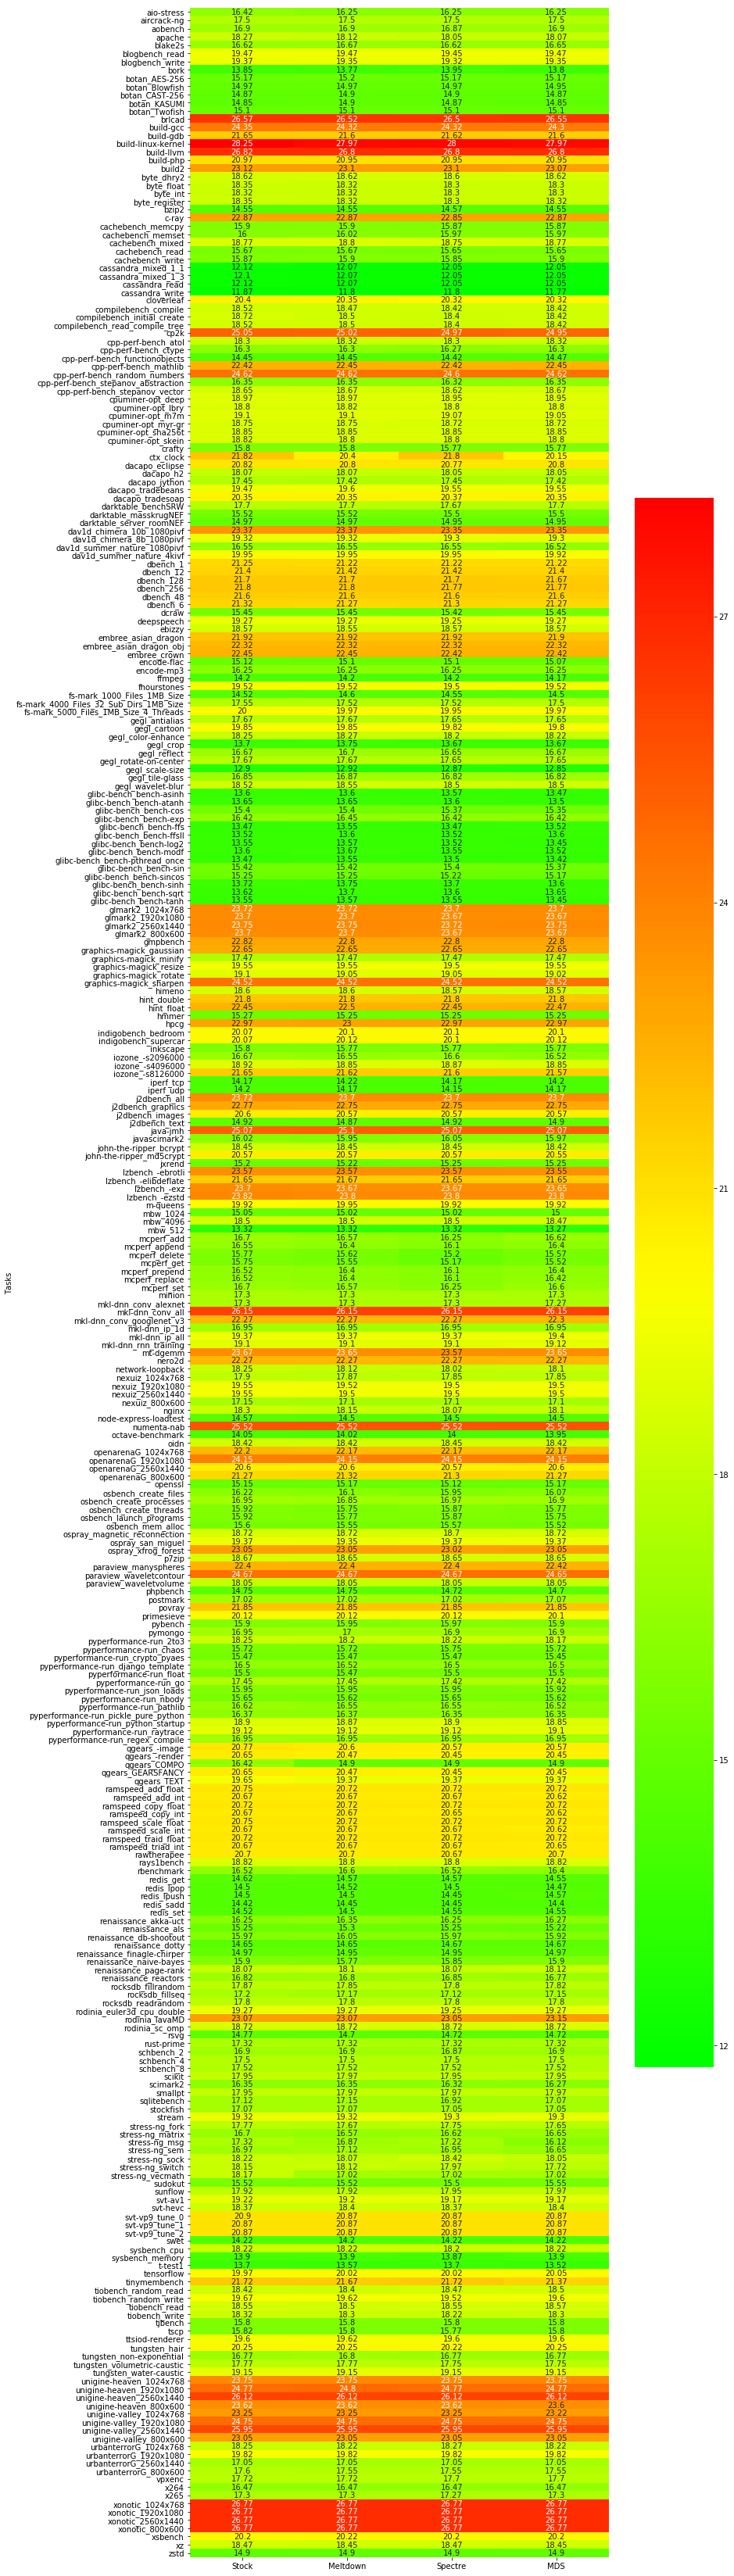

In [40]:
energyColors = mcolors.LinearSegmentedColormap.from_list("n",['#00FF00','#12FF00','#24FF00','#35FF00','#47FF00','#58FF00','#6AFF00','#7CFF00','#8DFF00','#9FFF00','#B0FF00','#C2FF00','#D4FF00','#E5FF00','#F7FF00','#FFF600','#FFE400','#FFD300','#FFC100','#FFAF00','#FF9E00','#FF8C00','#FF7B00','#FF6900','#FF5700','#FF4600','#FF3400','#FF2300','#FF1100','#FF0000',
])
plt.figure(figsize=(12, 60))
sns.heatmap(data_order, annot=True, fmt="g",cmap=energyColors, linecolor='white')
plt.savefig('mitigation_patches_log.pdf')
plt.show()
